In [1]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/107.7 GB disk)


In [77]:
from ultralytics import YOLO
from IPython.display import display, Image

In [22]:
model = YOLO('detect.pt')
results = model.predict(source='https://upload.wikimedia.org/wikipedia/commons/6/62/Group_of_kids_in_Jalrez_Valley_in_Wardak_Afghanistan.jpg', conf=0.25)

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.

Found https://upload.wikimedia.org/wikipedia/commons/6/62/Group_of_kids_in_Jalrez_Valley_in_Wardak_Afghanistan.jpg locally at Group_of_kids_in_Jalrez_Valley_in_Wardak_Afghanistan.jpg
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/Group_of_kids_in_Jalrez_Valley_in_Wardak_Afghanistan.jpg: 448x640 8 faces, 294.0ms
Speed: 10.8ms preprocess, 294.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


In [42]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [74]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
import torchvision
import scipy.io
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
Mounted at /content/gdrive


('sad', tensor(5), tensor([7.2704e-02, 2.3420e-04, 1.5235e-02, 2.6162e-03, 4.0806e-02, 8.6823e-01, 1.7171e-04]))


('happy', tensor(3), tensor([2.3857e-04, 8.9625e-05, 4.3029e-04, 9.7770e-01, 2.0124e-02, 4.9945e-04, 9.2013e-04]))


('neutral', tensor(4), tensor([1.5209e-04, 8.7460e-05, 8.7751e-04, 2.5361e-04, 9.9726e-01, 5.0581e-04, 8.6148e-04]))


('neutral', tensor(4), tensor([3.9170e-04, 6.9447e-05, 5.4368e-03, 4.2284e-04, 9.8716e-01, 5.3217e-03, 1.2010e-03]))


('neutral', tensor(4), tensor([2.1569e-04, 5.5692e-06, 6.3251e-04, 2.0754e-04, 9.9738e-01, 1.4505e-03, 1.0549e-04]))


('sad', tensor(5), tensor([1.8141e-02, 5.9486e-04, 2.3613e-01, 1.8930e-03, 1.3143e-01, 6.1105e-01, 7.6091e-04]))


('happy', tensor(3), tensor([2.8857e-02, 1.6920e-04, 1.8198e-02, 9.3352e-01, 5.7985e-04, 1.8042e-02, 6.3354e-04]))


('neutral', tensor(4), tensor([2.4495e-02, 2.6566e-04, 7.7239e-03, 3.0653e-01, 5.4794e-01, 1.0569e-01, 7.3550e-03]))


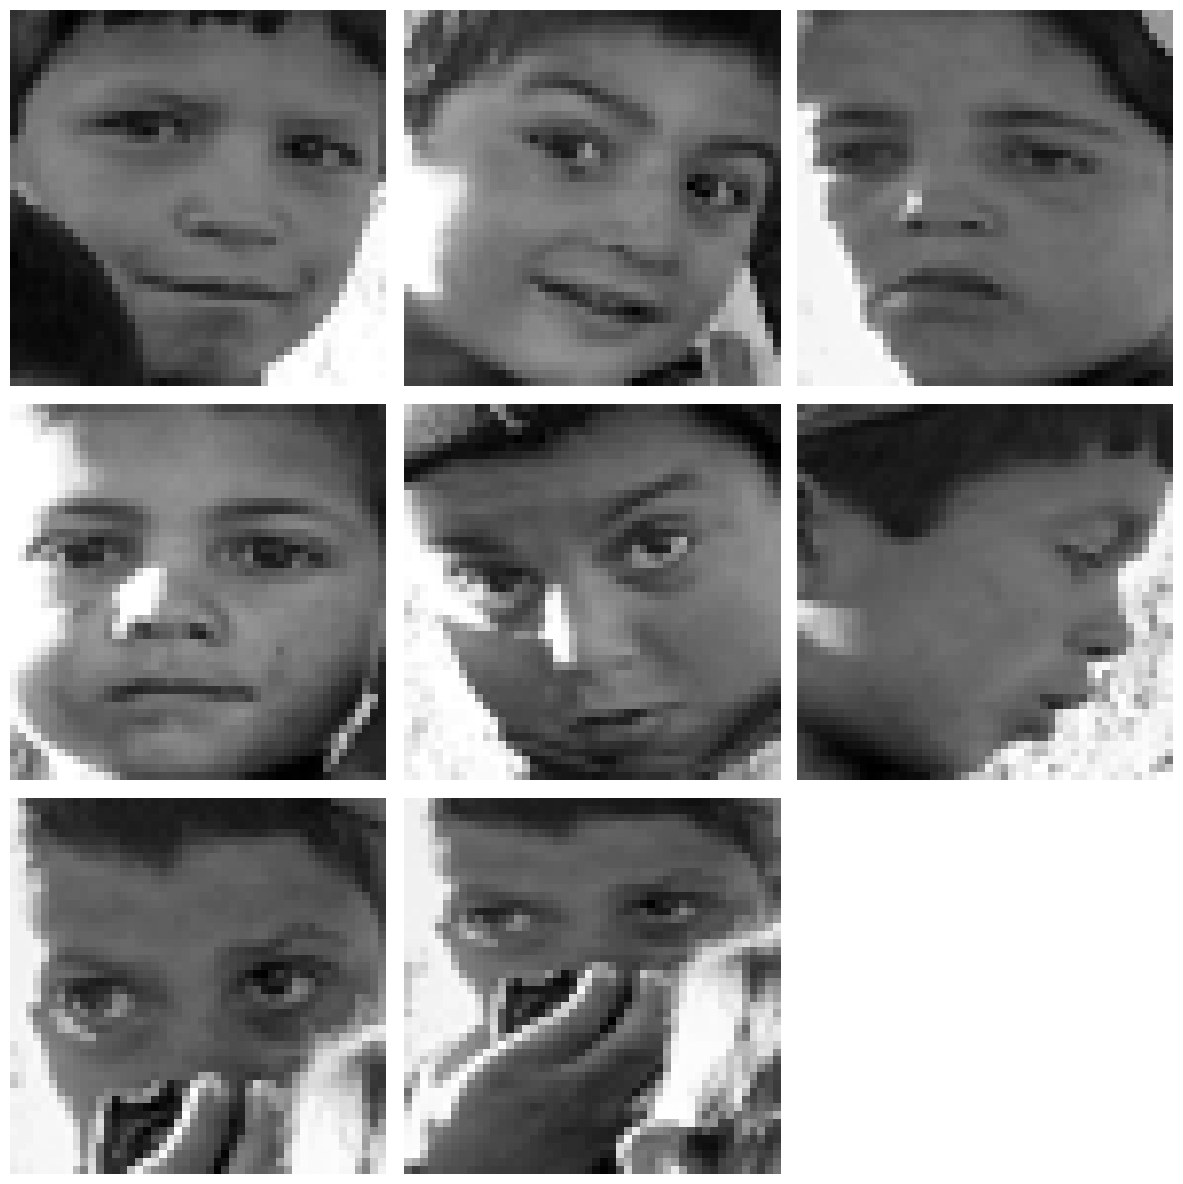

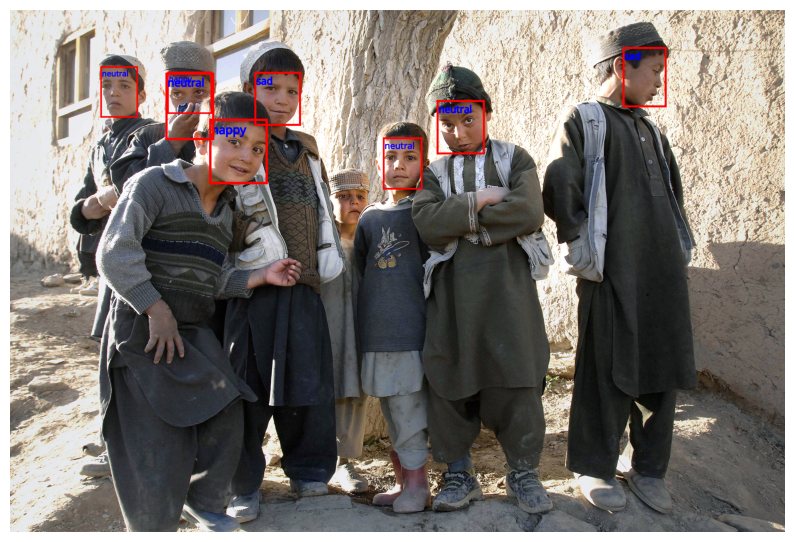

In [76]:
image_path = 'Group_of_kids_in_Jalrez_Valley_in_Wardak_Afghanistan.jpg'  # Replace with your image path
image = Image.open(image_path)

num_images = len(results[0].boxes.xyxy)
image_with_boxes = image.copy()
model = load_learner('mood.pkl', cpu=True)
draw = ImageDraw.Draw(image_with_boxes)

cols = 3
rows = (num_images // cols) + (num_images % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten()

for i, box in enumerate(results[0].boxes.xyxy):
    # print(box)
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])

    cropped_image = image.crop((x1, y1, x2, y2))
    resized_image = cropped_image.resize((48, 48))
    grayscale_image = resized_image.convert('L')

    axes[i].imshow(grayscale_image, cmap='gray')
    axes[i].axis('off')

    w = (y2+x2-y1-x1)//50
    pil_image = PILImage.create(grayscale_image)
    prediction = model.predict(pil_image)
    # print(prediction)
    text = prediction[0]
    text_position = (x1 + w, y1 + w)
    draw.rectangle([x1, y1, x2, y2], outline="red", width=w)
    font = ImageFont.truetype("opensans.ttf", 5*w)
    draw.text(text_position, text, fill="blue",font=font, stroke_width=int(w*0.2))


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()